In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [8]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


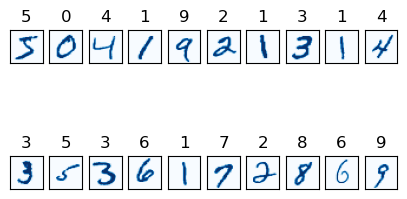

In [9]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


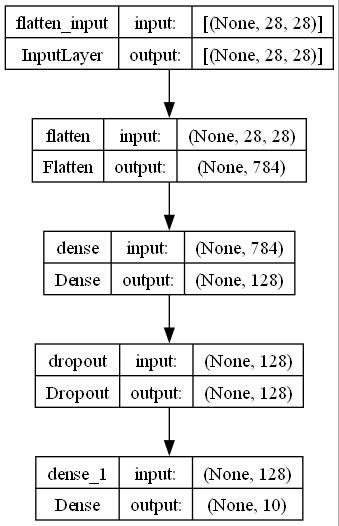

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

In [13]:
prediction = model(x_train[:1]).numpy()
prediction

array([[-0.619511  , -0.43583325, -0.2177771 , -0.24840304, -0.0890726 ,
        -0.45636785,  0.3341476 , -0.08487548, -0.08889121, -0.6121583 ]],
      dtype=float32)

In [14]:
tf.nn.softmax(prediction).numpy()

array([[0.06652633, 0.07993993, 0.09941785, 0.09641924, 0.11307329,
        0.07831514, 0.17264827, 0.11354887, 0.1130938 , 0.06701728]],
      dtype=float32)

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1435 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1083 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0755 - accuracy: 0.9764


In [17]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0825 - accuracy: 0.9744 - 757ms/epoch - 2ms/step


[0.08248291164636612, 0.974399983882904]

In [18]:
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.5905128e-08, 4.7731952e-09, 6.5139297e-06, 4.3420505e-04,
        1.1107233e-10, 4.2743842e-08, 9.6055657e-14, 9.9953640e-01,
        1.6646439e-07, 2.2713397e-05],
       [6.0531033e-07, 1.2590884e-03, 9.9871278e-01, 2.3267527e-05,
        1.7487724e-14, 7.4196151e-07, 8.6307530e-08, 1.1196239e-11,
        3.4358079e-06, 2.7167588e-13],
       [5.1945699e-07, 9.9806589e-01, 3.0508294e-04, 3.8792121e-05,
        1.9033611e-04, 2.3867690e-06, 4.2390173e-05, 1.1594617e-03,
        1.9435874e-04, 8.2176899e-07],
       [9.9993229e-01, 1.8073470e-09, 4.1175381e-06, 2.0366908e-06,
        3.5084199e-08, 5.1781490e-07, 2.6196300e-05, 4.9926425e-06,
        4.1440419e-08, 2.9923276e-05],
       [8.0332902e-06, 3.3891513e-07, 2.4689177e-06, 1.4184483e-06,
        9.9218583e-01, 3.1069192e-06, 6.3002057e-07, 3.6410603e-04,
        2.5327807e-07, 7.4337330e-03]], dtype=float32)>

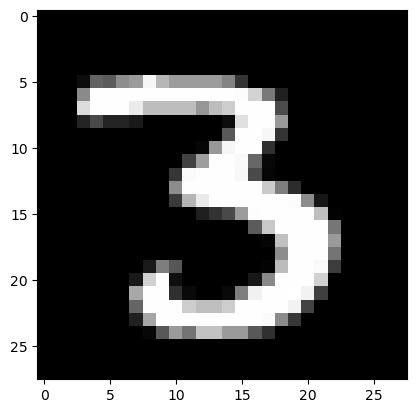

In [19]:
img = x_train[12]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [20]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 127ms/step
predicted : 3
